# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

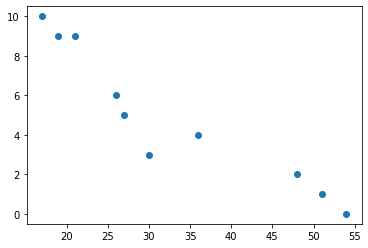

In [ ]:
x = student_data['Age']
y = student_data['Tardies']

plt.scatter(x,y)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Initially it would appear that tardiness diminishes with age

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# Your response here.
#correlation:
display(student_data.corr())
#This two variables have a strong negative correlation, when age increases, tardiness diminishes
#covariance:
display(student_data.cov())
#indeed, there's a strong negative covariance, both variables grow in opposite directions

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
from sklearn import linear_model

x = student_data['Age']
y = student_data['Tardies']
model = linear_model.LinearRegression()
result = model.fit(pd.DataFrame(x),y)
display(result.intercept_)
display(result.coef_)

12.888803363135771

array([-0.24282077])

Plot your regression model on your scatter plot.

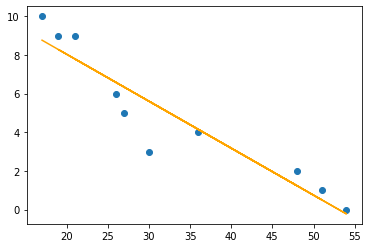

In [ ]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
result.score(pd.DataFrame(x),y)

0.8820265558250109

In [ ]:
#it seems like a good fit, with the given dataset. However, the sample itself is too small to jump to conclusions.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

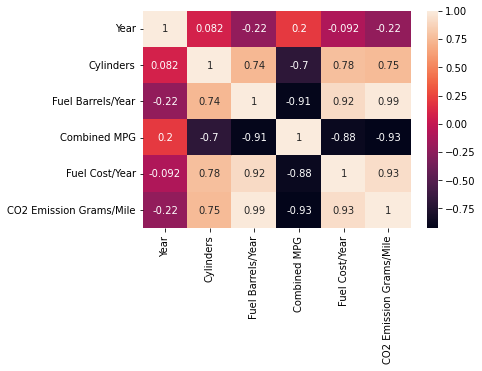

In [ ]:
X = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = vehicles[['CO2 Emission Grams/Mile']]
  
X_correlation = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]

sns.heatmap(X_correlation.corr(),annot=True, xticklabels = X_correlation.corr().columns,yticklabels = X_correlation.corr().columns)

In [ ]:
#Fuel Barrels/Year is the variable that has a stronger positive correlation with CO2 emissions. 
# and exactly for this same reason, combined MPG (mileage per gallon) is the variable that has the stronger
# negative correlation. When Combined MPG increases, CO2 emissions decrease. Year seems to be the least important variable

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
X = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = vehicles[['CO2 Emission Grams/Mile']]
model = linear_model.LinearRegression()
result = model.fit(X,y)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
display(result.intercept_)
display(result.coef_)

array([769.88828365])

array([[-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]])

In [ ]:
result.score(X,y)
#The result is very good, the most important variables are Fuel Barrels/Year and Cylinders


0.9808734920269122

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
party_att = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
party_att


,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [ ]:
party_att.corr()

,Invited,Attended
Invited,1.00000,0.96523
Attended,0.96523,1.00000


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

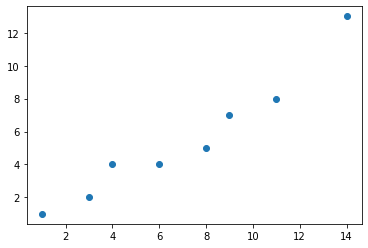

In [ ]:
x = party_att[['Invited']]
y = party_att[['Attended']]
plt.scatter(x,y)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
from sklearn import linear_model

x = party_att[['Invited']]
y = party_att[['Attended']]
model = linear_model.LinearRegression()
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)


array([-0.43939394])

array([[0.84848485]])

In [ ]:
result.score(x,y)

0.9316696375519905

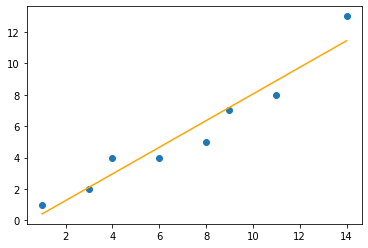

In [ ]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
#The last data point looks like an outlier. However, overall, it seems as if there's a positive trend
# where the number of attendance grows with the number of guests invited to the party.


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

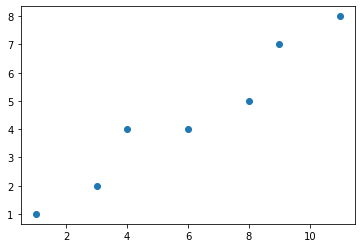

In [ ]:
party_att2 = pd.DataFrame({'Invited': [1,3,4,6,8,9,11], 'Attended': [1,2,4,4,5,7,8]})
x = party_att2[['Invited']]
y = party_att2[['Attended']]
plt.scatter(x,y)
plt.show()


In [ ]:
party_att2.corr()

,Invited,Attended
Invited,1.000000,0.971278
Attended,0.971278,1.000000


In [ ]:
from sklearn import linear_model

x = party_att2[['Invited']]
y = party_att2[['Attended']]
model = linear_model.LinearRegression()
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

array([0.32330827])

array([[0.68421053]])

In [ ]:
result.score(x,y)

0.9433811802232855

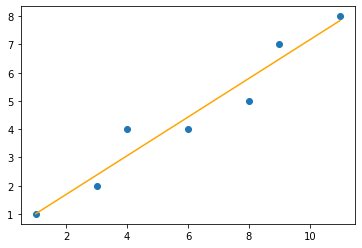

In [ ]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [ ]:
#The model seems to have improved by a little bit, the correlation slightly increased